# Density Profiles

Here we study the properties of the different desnity profiles that 
are usefull in galaxy formation theory, such as:

1. Plummer Profile
2. Hernquist Profile
3. Isothermal
4. NFW

# Plummer Profile:

The plumer density profile is one of the simplest models which describes
a constant density near the center and falls at large radii. 

$\Phi_P(r) = - \frac{GM}{\sqrt{r^2+a^2}}$

The scale length set the length $a$ in which the mayority of the density is enclosed. Note
that if $a$ is cero the plummer potential would be exactly as the potential of a point mass. 
In the other hand if $a$ goes to infty the potential is rewpresenting a very extended mass source.
In other words the scale length set up the size of the volume in which the mass $M$ is enclosed.

We may use Poisson equation in order to find the the density profile of the Plummer potential. 

$\nabla ^2 \Phi_P(r) = 4 \pi G \rho_P(r)$

$\nabla ^2 \Phi_P(r) = \frac{1}{r^2}\frac{d}{dr} \left (  r^2 \frac{d\Phi_P(r)}{dr} \right)$

$\frac{d\Phi_P(r)}{dr} = -GM \frac{r}{(r^2 + a^2)^{3/2}} $

$\frac{d}{dr} \left(  r^2 \frac{d\Phi_P(r)}{dr} \right) = \frac{3GMa^2}{(r^2 + a^2)^{5/2}}$

$4 \pi G \rho_P(r) = \frac{3GMa^2}{(r^2 + a^2)^{5/2}}$

$\rho_P(r) = \frac{3M}{4 \pi} \frac{a^2}{(r^2 + a^2)^{5/2}} $

$\rho_P (r) = \frac{3M}{4\pi a^3} (1 + \frac{r^2}{a^2})^{-5/2}$

In order to get the mass we integrate over all the volume of radius $r'$

$M_P(<r) = 4 \pi \int_0^r r'^2\frac{3M}{4\pi a^3} (1 + \frac{r'^2}{a^2})^{-5/2} dr'$

$M_P(<r) = \frac{3M}{a^3} \left( \frac{a^4 r^3 \sqrt{r^2/a^2 + 1}}{3(r^2 + a^2)^2}  \right)$

$M_P(<r) = M \frac{r^3}{(a^2+r^2)^{3/2}}$

Finally a quantity of particular interest is the circular velocity which can be derived as follows:

If a test particle of mass $m$ is orbitating the extended mass $M$ then in order to be in equilibrium
the gravitational force $F_g$ must be equal to the centripetal force.

$F_g = \frac{GmM}{r^2} = ma_c = m \frac{v_c^2}{r}$

$v_c = \sqrt{\frac{GM(<r)}{r}} $

$v_c = \sqrt{GM(\frac{r^2}{(r^2+a^2)^{3/2}})}$

In [3]:
%pylab inline
from astropy import constants
from astropy import units 

Populating the interactive namespace from numpy and matplotlib


In [4]:
G = constants.G
K = constants.k_B
print G
print K
G = G.to(units.kiloparsec**3 / (units.Msun * units.s**2)) 
K = K.to(units.Msun * units.kpc**2 / (units.s**2 * units.Kelvin))
print G
print K

  Name   = Gravitational constant
  Value  = 6.67384e-11
  Error  = 8e-15
  Units  = m3 / (kg s2)
  Reference = CODATA 2010
  Name   = Boltzmann constant
  Value  = 1.3806488e-23
  Error  = 1.3e-29
  Units  = J / K
  Reference = CODATA 2010
4.51835939627e-39 kpc3 / (s2 solMass)
7.28996615344e-93 kpc2 solMass / (K s2)


In [64]:
M = 1E12 #Msun
M = M*units.Msun
print M

1e+12 solMass


In [43]:
R = np.linspace(0, 25)
R = R*units.kpc

In [7]:
def mass_plummer(a, r, M):
    a = a*units.kpc
    Mass = M*r**3 / (a**2 + r**2)**(3/2.)
    return Mass

In [8]:
def rho_plummer(a, r, M):
    a = a*units.kpc
    rho = 3*M / (4 *np.pi * a**3) * (1 + r**2/a**2)**(-5/2)
    return rho

In [9]:
def potential_plummer(a, r, M):
    a = a*units.kpc
    phi =  - G*M / np.sqrt(r**2 + a**2)
    return phi

In [10]:
def vc_plummer(a, r, M):
    a = a*units.kpc
    vc = np.sqrt(G*M*( r**2/(r**2 + a**2)**(3/2.)))
    vc = vc.to(units.km / units.s)
    return vc

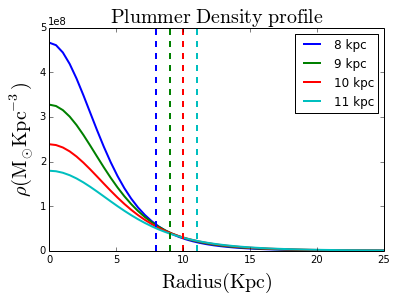

In [11]:
for i in range(8, 12):
    plot(R, rho_plummer(i, R, M), lw=2, label = str(i) + ' kpc')
axvline(8, ls='--', lw=2, c='b')
axvline(9, ls='--', lw=2, c='g')
axvline(10, ls='--', lw=2, c='r')
axvline(11, ls='--', lw=2, c='c')
legend()
xlabel('$\mathrm{Radius (Kpc)}$', fontsize=20)
ylabel(r'$\mathrm{\rho (M_\odot Kpc^{-3})}$', fontsize=20)
title('$\mathrm{Plummer\ Density\ profile}$', fontsize=20)
savefig('plummer_density.png', bbox_inches='tight')

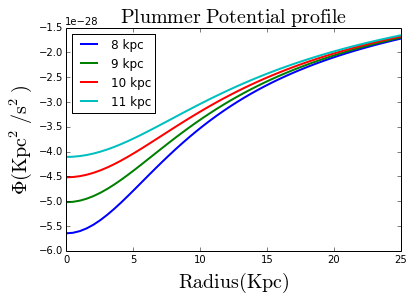

In [12]:
for i in range(8, 12):
    plot(R, potential_plummer(i, R, M), lw=2, label = str(i) + ' kpc')
legend(loc='best')
xlabel('$\mathrm{Radius (Kpc)}$', fontsize=20)
ylabel('$\mathrm{\Phi(Kpc^2/s^2)}$', fontsize=20)
title('$\mathrm{Plummer\ Potential\ profile}$', fontsize=20)
savefig('plummer_phi.png', bbox_inches='tight')

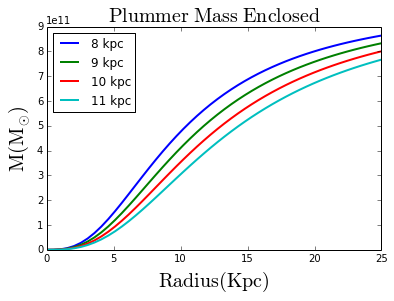

In [13]:
for i in range(8, 12):
    plot(R, mass_plummer(i, R, M), lw=2, label = str(i) + ' kpc')
legend(loc='best')
xlabel('$\mathrm{Radius (Kpc)}$', fontsize=20)
ylabel('$\mathrm{M (M_\odot)}$', fontsize=20)
title('$\mathrm{Plummer\ Mass\ Enclosed}$', fontsize=20)
savefig('plummer_mass.png', bbox_inches='tight')

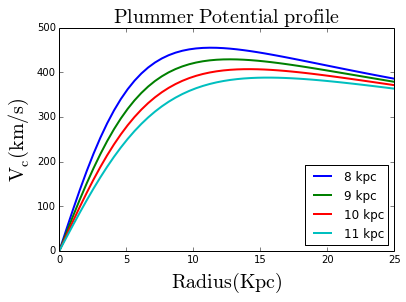

In [14]:
for i in range(8, 12):
    plot(R, vc_plummer(i, R, M), lw=2, label = str(i) + ' kpc')
legend(loc='best')
xlabel('$\mathrm{Radius (Kpc)}$', fontsize=20)
ylabel('$\mathrm{V_c(km/s)}$', fontsize=20)
title('$\mathrm{Plummer\ Potential\ profile}$', fontsize=20)
savefig('plummer_velocity.png', bbox_inches='tight')

# Hernquist Profile

$\Phi = - \frac{GM}{r+a}$

$\rho_{Hernquist}(r) =  \frac{M}{2\pi} \frac{a}{r(r+a)^3}$

$M_{Hernquist}(<r) = 2aM \int \frac{r}{(r+a)^3}dr $

$M_{Hernquist}(<r) = M \frac{r^2}{(r+a)^2}$

$v_c(r) = GM \frac{r}{(r+a)^2}$



In [15]:
def Potential_Hernquist(a, r, M):
    a = a*units.kpc
    phi = -G*M / (r+a)
    return phi

In [16]:
def Density_Hernquist(a, r, M):
    a = a*units.kpc
    rho = M / (2 * np.pi) * a / (r*(r+a)**3)
    return rho

In [17]:
def Mass_Hernquist(a, r, M):
    a = a*units.kpc
    Mass = M * r**2 / (r+a)**2
    return Mass

In [18]:
def vc_Hernquist(a, r, M):
    a = a*units.kpc
    vc = np.sqrt(G*M*r/(r+a)**2)
    vc = vc.to(units.km / units.s)
    return vc

/usr/local/lib/python2.7/dist-packages/astropy/units/quantity.py:785: RuntimeWarning: divide by zero encountered in true_divide
  return np.true_divide(self, other)


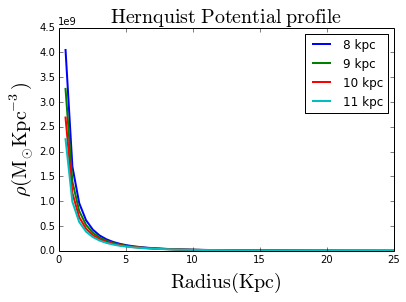

In [19]:
for i in range(8, 12):
    plot(R, Density_Hernquist(i, R, M), lw=2, label = str(i) + ' kpc')
xlabel('$\mathrm{Radius (Kpc)}$', fontsize=20)
ylabel(r'$\mathrm{\rho (M_\odot Kpc^{-3})}$', fontsize=20)
legend(loc='best')
title('$\mathrm{Hernquist\ Potential\ profile}$', fontsize=20)
savefig('hern_density.png', bbox_inches='tight')

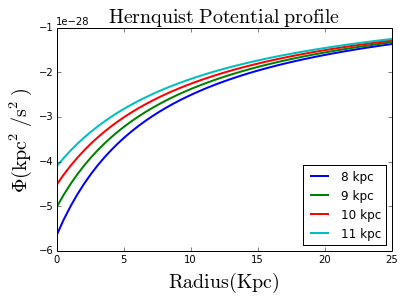

In [20]:
for i in range(8, 12):
    plot(R, Potential_Hernquist(i, R, M), lw=2, label = str(i) + ' kpc')
xlabel('$\mathrm{Radius (Kpc)}$', fontsize=20)
ylabel('$\mathrm{\Phi(kpc^2/s^2)}$', fontsize=20)
legend(loc='best')
title('$\mathrm{Hernquist\ Potential\ profile}$', fontsize=20)
savefig('hern_potential.png', bbox_inches='tight')

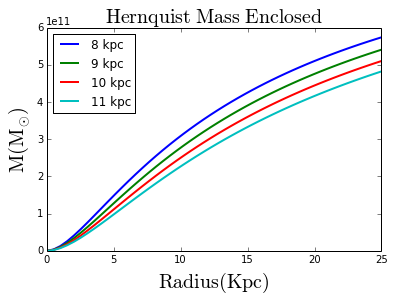

In [21]:
for i in range(8, 12):
    plot(R, Mass_Hernquist(i, R, M), lw=2, label = str(i) + ' kpc')
xlabel('$\mathrm{Radius (Kpc)}$', fontsize=20)
ylabel('$\mathrm{M (M_\odot)}$', fontsize=20)
legend(loc='best')
title('$\mathrm{Hernquist\ Mass\ Enclosed}$', fontsize=20)
savefig('hern_mass.png', bbox_inches='tight')

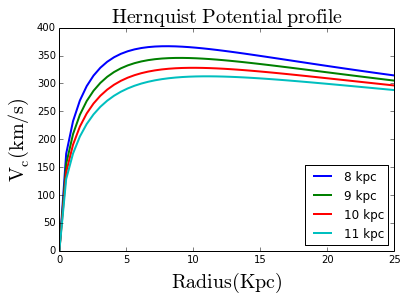

In [22]:
for i in range(8, 12):
    plot(R, vc_Hernquist(i, R, M), lw=2, label = str(i) + ' kpc')
xlabel('$\mathrm{Radius (Kpc)}$', fontsize=20)
ylabel('$\mathrm{V_c(km/s)}$', fontsize=20)
legend(loc='best')
title('$\mathrm{Hernquist\ Potential\ profile}$', fontsize=20)
savefig('hern_velocity.png', bbox_inches='tight')

# Isothermal profile

In [23]:
def rho_sis(a, v, G, r):
    a = a*units.kpc
    v = v.to(units.kpc / units.s)
    rho = v**2 / (4*np.pi * G*(r**2 + a**2))
    return rho

def mass_sis(v, G, r):
    v = v.to(units.kpc / units.s)
    M = v**2 * r/G
    return M

def phi_sis(v, r):
    v = v.to(units.kpc / units.s)
    phi = v**2 * log(r.value)
    return phi*units.kpc

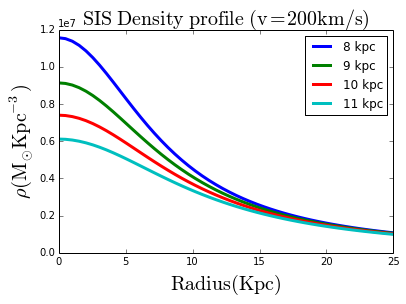

In [24]:
v = 200*units.km / units.s
for i in range(8, 12):
    plot(R, rho_sis(i, v, G, R), lw=3, label = str(i) + ' kpc')
xlabel('$\mathrm{Radius (Kpc)}$', fontsize=20)
ylabel(r'$\mathrm{\rho (M_\odot Kpc^{-3})}$', fontsize=20)
legend(loc='best')
title('$\mathrm{SIS\ Density\ profile\ (v=200km/s)}$', fontsize=20)
savefig('sis_density.png', bbox_inches='tight')

/usr/lib/pymodules/python2.7/matplotlib/axes.py:4747: UserWarning: No labeled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labeled objects found. "


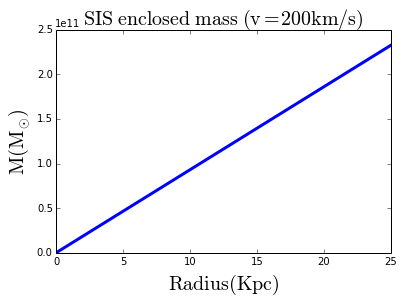

In [25]:
plot(R, mass_sis(v, G, R), lw=3)
xlabel('$\mathrm{Radius (Kpc)}$', fontsize=20)
ylabel(r'$\mathrm{M (M_\odot)}$', fontsize=20)
legend(loc='best')
title('$\mathrm{SIS\ enclosed\ mass\ (v=200km/s)}$', fontsize=20)
savefig('sis_mass.png', bbox_inches='tight')

/usr/local/lib/python2.7/dist-packages/IPython/kernel/__main__.py:14: RuntimeWarning: divide by zero encountered in log


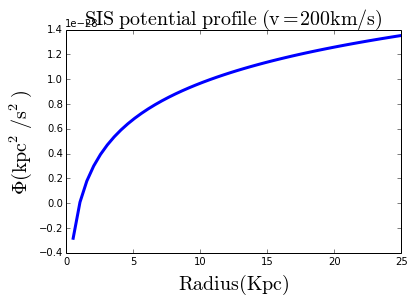

In [26]:
plot(R, phi_sis(v,  R), lw=3)
xlabel('$\mathrm{Radius (Kpc)}$', fontsize=20)
ylabel('$\mathrm{\Phi(kpc^2/s^2)}$', fontsize=20)
title('$\mathrm{SIS\ potential\ profile\ (v=200km/s)}$', fontsize=20)
savefig('sis_phi.png', bbox_inches='tight')

# NFW 

$\rho_{NFW}(r) = \frac{M}{2\pi a^3(r/a) (1 + r/a)^2}$

$M_{NFW}(r) = 2 M  \left(  ln(1 + c) - \frac{c}{1 + c} \right)$

$\Phi_{NFW} = -4\pi G M \frac{ln(1 + r/a)}{r}$


$c = r_{vir}/a$

$c(M_{vir}) = 9.60  \left( \frac{M_{vir}}{10^{12}h^{-1}M_{\odot}} \right)^{-0.075}$ for halos at $z=0$ from Klypin et al 2011

$v_c(r) = \sqrt{\left(\dfrac{M(r)G}{r}\right)} = \sqrt{\left( \dfrac{2 M  \left(  ln(1 + c) - \frac{c}{1 + c} \right)}{r} \right)}$

In [27]:
def rho_NFW(c, r, M, G):
    H_0 = 70*units.km / (units.s * units.Mpc)
    pcrit = rho_crit(G, 0, 0.27, H_0)
    rvir = (3* M / (360*pcrit*4*np.pi) )**(1/3.)
    rvir = rvir.to(units.kpc)
    a = rvir / c
    print a
    rho = M / ( 2*np.pi*a**3 *(r/a)*(1 + r/a)**2 )
    return rho

In [28]:
def mass_NFW(c, r, M, G):
    H_0 = 70*units.km / (units.s * units.Mpc)
    pcrit = rho_crit(G, 0, 0.27, H_0)
    rvir = (3* M / (360*pcrit*4*np.pi) )**(1/3.)
    rvir = rvir.to(units.kpc)
    a = rvir / c
    M = 2*M *(log(1 + r/a) - (r/a)/(1 + (r/a)))
    return M

In [29]:
def phi_NFW(c, r, M, G):
    H_0 = 70*units.km / (units.s * units.Mpc)
    pcrit = rho_crit(G, 0, 0.27, H_0)
    rvir = (3* M / (360*pcrit*4*np.pi) )**(1/3.)
    rvir = rvir.to(units.kpc)
    a = rvir / c
    phi = - 4 * np.pi * G * M * log( 1 + r/a) / r
    return phi

In [30]:
def vc_NFW(c, r, M, G):
    H_0 = 70*units.km / (units.s * units.Mpc)
    pcrit = rho_crit(G, 0, 0.27, H_0)
    rvir = (3* M / (360*pcrit*4*np.pi) )**(1/3.)
    rvir = rvir.to(units.kpc)
    a = rvir / c
    print a
    vc = np.sqrt( ( 2*M*G* (log(1 + r.value/a.value) - (r/a) / (1 + r/a)) )/r )
    vc = vc.to(units.km / units.s)
    return vc
    

In [66]:
for i in range(8, 12):
    plot(R, rho_NFW(i, R, M, G), lw=2, label = 'c=' +str(i) + ' kpc')
xlabel('$\mathrm{Radius (Kpc)}$', fontsize=20)
ylabel(r'$\mathrm{\rho (M_\odot Kpc^{-3})}$', fontsize=20)
legend(loc='best')
title('$\mathrm{NFW\ Density\ profile}$', fontsize=20)
savefig('NFW_density.png', bbox_inches='tight')

NameError: global name 'rho_crit' is not defined

In [ ]:
for i in range(8, 12):
    plot(R, mass_NFW(i, R, M, G), lw=2, label = 'c=' + str(i) + ' kpc')
xlabel('$\mathrm{Radius (Kpc)}$', fontsize=20)
ylabel(r'$\mathrm{M (M_\odot)}$', fontsize=20)
legend(loc='best')
title('$\mathrm{NFW\ Mass\ Enclosed}$', fontsize=20)
savefig('NFW_mass.png', bbox_inches='tight')

In [32]:
for i in range(8, 12):
    plot(R, phi_NFW(i, R, M, G), lw=2, label = 'c=' + str(i) + ' kpc')
xlabel('$\mathrm{Radius (Kpc)}$', fontsize=20)
ylabel(r'$\mathrm{\Phi (kpc^2/s^2)}$', fontsize=20)
legend(loc='best')
title('$\mathrm{NFW\ Potential}$', fontsize=20)
savefig('NFW_potential.png', bbox_inches='tight')

NameError: global name 'rho_crit' is not defined

In [33]:
for i in range(8, 12):
    plot(R, vc_NFW(i, R, M, G), lw=2, label = 'c=' + str(i) + ' kpc')
xlabel('$\mathrm{Radius (Kpc)}$', fontsize=20)
ylabel(r'$\mathrm{v_c (km/s)}$', fontsize=20)
legend(loc='best')
title('$\mathrm{NFW\ circular\ velocity}$', fontsize=20)
savefig('NFW_vc.png', bbox_inches='tight')

NameError: global name 'rho_crit' is not defined

# Miyamoto - Nagai:

In [72]:
def MN_potential(a, b, G, M, r, z):
    z = z*units.kpc
    a = a*units.kpc
    b = b*units.kpc
    phi = - G*M / (np.sqrt(R**2 + ( a + np.sqrt( z**2 + b**2 ))**2 ) )
    return phi

def MN_density(a, b, M, r, z):
    z = z*units.kpc
    a = a*units.kpc
    b = b*units.kpc
    r = r*units.kpc
    rho = b**2 * M / (4*np.pi) * (a*R**2 + (a + 3*np.sqrt(z**2+b**2) )*(a + np.sqrt(z**2 + b**2) )**2) / ((r**2.0 + (a + np.sqrt(z**2 + b**2)**2.0))**(5.0/2.0)* (z**2 + b**2)**(3/2.0))
    return rho.value
def MN_potential_plot(a, b, G, M, r, z):
    z = z*units.kpc
    a = a*units.kpc
    b = b*units.kpc
    phi = - G*M / (np.sqrt(R**2 + ( a + np.sqrt( z**2 + b**2 ))**2 ) )
    return phi

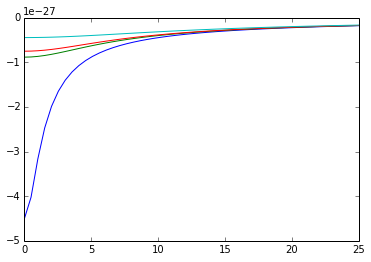

In [53]:
for i in range(0, 10, 5):
    for j in range(0, 10, 5):
        plot(R, MN_potential(i, j, G, M, R, 1))

In [104]:
def MN_density(a, b, M, r, z):
    z = z*units.kpc
    a = a*units.kpc
    b = b*units.kpc
    r = r*units.kpc
    #print r
    M = M.value
    rho = (b**2 * M / (4*np.pi)) * (a*r**2 + ( a + 3*(np.sqrt(z**2 + b**2)))*( a + np.sqrt(z**2 + b**2))**2 ) /( ( (r**2 + (a + np.sqrt(z**2 + b**2))**2)**(5./2.) * (z**2 + b**2)**(3./2.)) )
    return rho.value

[  0.           0.51020408   1.02040816   1.53061224   2.04081633
   2.55102041   3.06122449   3.57142857   4.08163265   4.59183673
   5.10204082   5.6122449    6.12244898   6.63265306   7.14285714
   7.65306122   8.16326531   8.67346939   9.18367347   9.69387755
  10.20408163  10.71428571  11.2244898   11.73469388  12.24489796
  12.75510204  13.26530612  13.7755102   14.28571429  14.79591837
  15.30612245  15.81632653  16.32653061  16.83673469  17.34693878
  17.85714286  18.36734694  18.87755102  19.3877551   19.89795918
  20.40816327  20.91836735  21.42857143  21.93877551  22.44897959
  22.95918367  23.46938776  23.97959184  24.48979592  25.        ] kpc


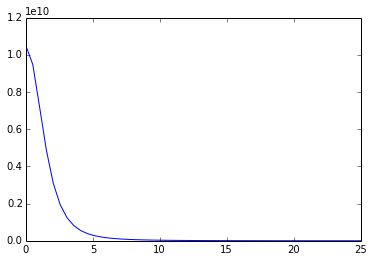

In [92]:
#MN_density(1, 1, M, 1, 1)
plot(R, MN_density(1, 1, M, R, 1))

In [136]:
den = zeros([41, 41])
den2 = zeros([20, 20])
den3 = zeros([20, 20])
den4 = zeros([20, 20])

for i in range(-20, 20):
    for j in range(-5, 5):
        rho = MN_density(1, 3, M, i, j)
        #print rho
        den[j+20][i+20] = rho
        #den[39-i][j] = rho
        #den[39-i][39-j] = rho
        #den[i][39-j] = rho
    

(15, 25)

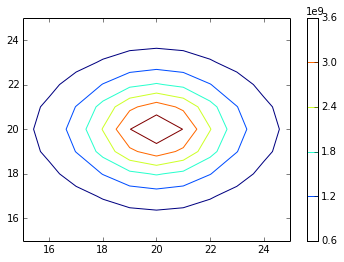

In [137]:
#z = linspace(-5, 5)
#r = linspace(0, 20)
#Z, R = meshgrid(z, r)
#rho =  MN_density(1, 1, M, R, Z)
plt.figure()
CS = contour(den)
colorbar()
plt.clabel(CS, inline=1, fontsize=10)
xlim(15, 25)
ylim(15, 25)

#contour(den2)


In [138]:
rho = MN_density(0, 1, M, R, 10)

# Virial Radius and Virial Mass

$\rho_{vir} = \frac{3M_{vir}}{4 \pi r_{vir}^3} = \Delta_{vir} \Omega_m \rho_{crit} $

$r_{vir} = \left( \frac{3M_{vir}}{4 \pi \Delta_{vir} \Omega_m \rho_{crit} } \right )^{1/3}$

$\Delta_{vir}=360$ from top hat model(Klypin et al 2011: http://arxiv.org/pdf/1002.3660v4.pdf)
at low z.

$\Omega_m = 0.27$

$\rho_{crit} = \frac{3H^2}{8\pi G}$

$H^2 = H_0^2 (\Omega_r a^{-4} + \Omega_m a^{-3} + \Omega_k a^{-2} + \Omega_{\Lambda})$

How you find r_vir?

In [32]:
def H(z, Omega0, H_0):
    Lambda0 = 1. - Omega0
    return H_0*(Omega0*(1+z)**3 - (Omega0+Lambda0-1)*(1+z)**2 + Lambda0)**0.5

def Omega_z(z,Omega0, H_0):
    return Omega0 * (1+z)**3 * (H_0/H(z,Omega0, H_0))**2

def rho_crit(G, z, Omega0, H_0):
    H2 = H(z, Omega0, H_0)**2
    rho = 3*H2 / (8*np.pi*G)
    return rho

In [33]:
H_0 = 70*units.km / (units.s * units.Mpc)# km/sMpc
print H_0 

H_0 = H_0.to(units.Mpc / (units.s * units.Mpc))

print H_0, G

70.0 km / (Mpc s)
2.26854550263e-18 1 / s 4.51835939627e-39 kpc3 / (s2 solMass)


In [34]:
pcrit = rho_crit(G, 0, 0.27, H_0)
print pcrit

135.955134016 solMass / kpc3


In [35]:
def rvir(Mvir, z):
    Mvir = Mvir * units.Msun
    G = constants.G
    G = G.to(units.kiloparsec**3 / (units.Msun * units.s**2)) 
    H_0 = 70*units.km / (units.s * units.Mpc)# km/sMpc
    H_0 = H_0.to(units.Mpc / (units.s * units.Mpc))
    Omega0 = 0.27
    Deltavir = 360
    pcrit = rho_crit(G, z, Omega0 , H_0)
    Rvir = ( 3*Mvir / (4 * np.pi * Deltavir * pcrit * Omega0) )**(1/3.)
    return Rvir

In [36]:
rvirt = rvir(1e12, 0)
print rvirt

262.391545659 kpc


# $\Delta_{vir}$

 This comes up from the solutions for the 
 top hat model and can be expressed as:
 
 $\Delta_{vir} = 18 \pi^2 + 82x - 32x^2$
 where $x = \Omega_m(z) - 1$

In [37]:
def Dvir(z):
    H = 70
    Omega0 = 0.27
    Omegaz = Omega_z(z, Omega0, H)
    x = Omegaz - 1
    Deltavir =  ( (18*np.pi**2) +  (82*x) - 39*x**2 ) / Omegaz
    return Deltavir

In [38]:
Z = linspace(0, 10, 100)
Dv = Dvir(Z)

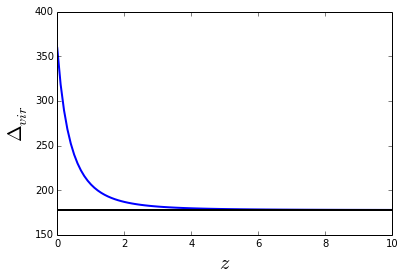

In [39]:
plot(Z, Dv, lw=2)
axhline(18*np.pi**2, lw=2, c='k')
xlabel('$z$', fontsize=20)
ylabel('$\Delta_{vir}$', fontsize=20)
savefig('deltavir.png', bbox_inches = 'tight')

In [ ]:

# From rvir to r200